# Project: Investigate a Dataset from IMDb movie 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Our Dataset as we will see consist of (10866 row, 21 column) so based on the questions and the results I will specify later on I will not need all of these data so I will pick what I need only to facilitate the investigation process.
I also noticed some of data needs to be modified such as the 'release_date' it's not in the right format but as I will not use it I will leave as it is.

Our data set contains data about movies on IMDb website such as [Popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords].
In my investigation I will focus on ['revenue'] and I will try to find out what is the factors affecting on it. I will assume that I have a Dependant variable ['revenue'] I will call it later on as 'y' -if we perfom a regression and prediction- and three Independant variables ['budget','Popularity', 'Runtime'] and I will call them later on as 'x' -if we perfom a regression and prediction-.

### Q1: What is the factors effect on the movie revenue?
### Q2: What is the most effective factor?
### Q3: Is the highest budget have the highest revenue?

In [1]:
# import for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Reading the Dataset after I upload it localy
df=pd.read_csv('tmdb-movies.csv')
# Take alook at the dataset through some few lines
df.shape

(10866, 21)

In [3]:
df.info()
# I discovered a lot of missing data but it's located in fields that I will not use such as the 'genres'.
# Alot of Categorical data needs to be encoded to carryout the analysis I will perform that in 'genres' only if i use it.
# release_date type is not in date format which can be eaisly fixed as follows:
# df['release_date']= pd.to_datetime(df['release_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Dependant variable ['revenue'] and three Independant variables ['budget','Popularity', 'Runtime']

In [6]:
#Defined of the dataset for case1
df_case1= df[['popularity','budget','revenue','runtime','release_date']]
df_case1.describe()

,popularity,budget,revenue,runtime
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863
std,1.000185,3.091321e+07,1.170035e+08,31.381405
min,0.000065,0.000000e+00,0.000000e+00,0.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000


In [7]:
df_case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
release_date    10866 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 424.5+ KB


## Data Cleaning and preprocessing 

### First I will check the data risk through the below finction called " Measure of Risk" which calculate the Variance and Std. Deviation thier values must not exceed 10% from the maximum sample values.

In [8]:
y_global = df_case1['revenue']
x_global = df_case1[['popularity','budget','runtime']]
def measure_risk(df_col):
    if df_case1['popularity'].std()/df_case1['popularity'].max()>0.1:
        result = "There's a Risk in this Data"
    else:
        result = "No Risk"
    return result

measure_risk(x_global)
measure_risk(y_global)

'No Risk'

### Handling the missing and worng format data

#### 1. I noticed that more than 50% of the budget value equal zero so instead of drop them I will split the dataframe as below.
#### 2. I will leave the zeros in revenue because it's meaningfull that we have a movie with zero revenue.
#### 3. I will change the release_date format to be date.

In [9]:
DF_zerobudget = df_case1[ df_case1['budget'] == 0.0 ]
DF_budget = df_case1[ df_case1['budget'] > 0.0 ]

DF_zerobudget.info()
DF_budget.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 5 columns):
popularity      5696 non-null float64
budget          5696 non-null int64
revenue         5696 non-null int64
runtime         5696 non-null int64
release_date    5696 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 267.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 5 columns):
popularity      5170 non-null float64
budget          5170 non-null int64
revenue         5170 non-null int64
runtime         5170 non-null int64
release_date    5170 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 242.3+ KB


In [10]:
DF_budget['release_date']= pd.to_datetime(DF_budget['release_date'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
DF_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 5 columns):
popularity      5170 non-null float64
budget          5170 non-null int64
revenue         5170 non-null int64
runtime         5170 non-null int64
release_date    5170 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 242.3 KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:
### What is the factors effect on the movie revenue?

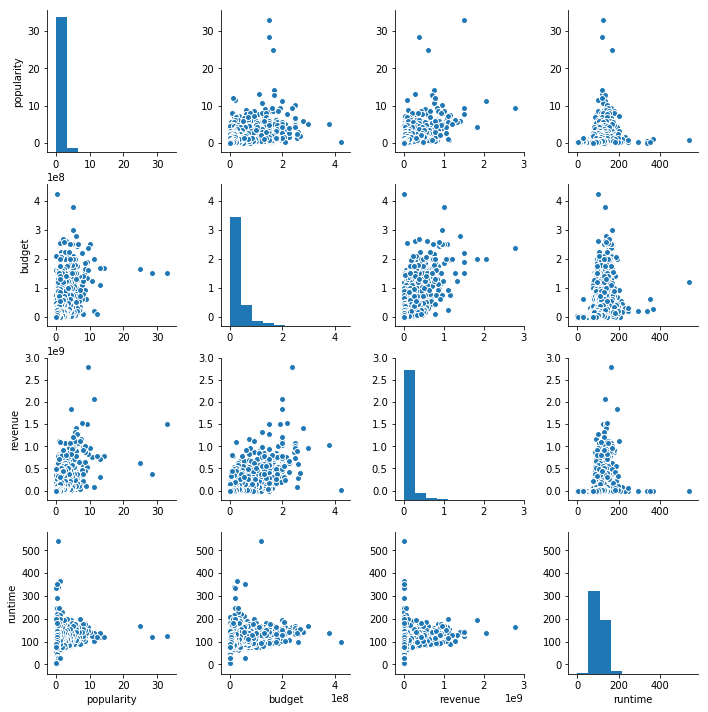

In [12]:
#Let us visulaize the data to figureout
sns.pairplot(DF_budget);

#### From the above figures it seems that the most effective factors on movie revenue is ['budget'] and ['popularity'] 
#### Let us zoom in

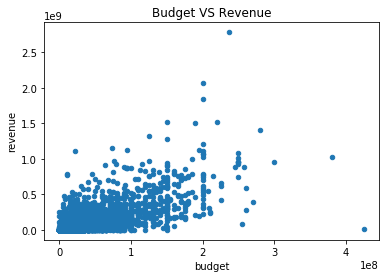

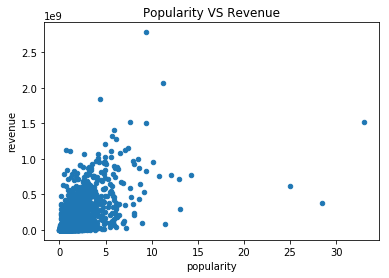

In [14]:
DF_budget.plot(x='budget', y='revenue', title='Budget VS Revenue',kind='scatter');
DF_budget.plot(x='popularity', y='revenue',title='Popularity VS Revenue', kind='scatter');

#### The above graph illustrate the strong relationship between budget and revenue with a positive correlation

### Research Question 2  
### What is the most effective factor?

In [15]:
DF_budget.corr()

,popularity,budget,revenue,runtime
popularity,1.000000,0.479958,0.639185,0.201309
budget,0.479958,1.000000,0.700147,0.265566
revenue,0.639185,0.700147,1.000000,0.227356
runtime,0.201309,0.265566,0.227356,1.000000


#### As we notice from the above table there is a strong positive correlation between ['budget'] and ['revenue']

### Question 3
### Is the highest budget have the highest revenue?

In [16]:
df_arr=DF_budget.sort_values(by=['budget'],ascending=False)
df_arr.head()

,popularity,budget,revenue,runtime,release_date
2244,0.250540,425000000,11087569,100,2010-12-02
3375,4.955130,380000000,1021683000,136,2011-05-11
7387,4.965391,300000000,961000000,169,2007-05-19
14,5.944927,280000000,1405035767,141,2015-04-22
6570,1.957331,270000000,391081192,154,2006-06-28


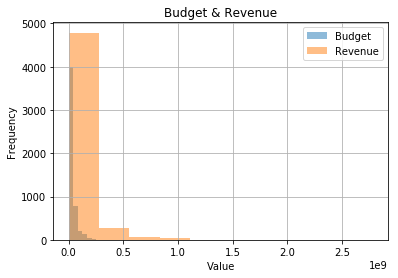

In [33]:
df_arr['budget'].hist(alpha=0.5,label='Budget');
df_arr['revenue'].hist(alpha=0.5,label='Revenue');
plt.legend();
plt.title('Budget & Revenue');
plt.xlabel('Value');
plt.ylabel('Frequency');

### The above graph illustrate that it's not maindatory the highest movie budget have the highest revenue 

## COMMENTS/ RECOMMENDATION
#### 1. The data contains many fields I do belive it's uselss as it will not be used in any current or future analysis such as [ 'homepage', 'tagline', imdb_id].
#### 2. The data contains a lot of categorical data which I do belive it will be easier if a field like ['genres'] have a standard codes instead of spent time make encoding.
#### 3. Almost 50% of the movies has zero budget which is not realstic to happend.
#### 4. A duplicate column for movie release ['release_date' , 'release_Year']


## Conclusion
#### 1. The most effective factors on movie revenue is ['budget'] and ['popularity']
#### 2. There is a strong positive correlation between ['budget'] and ['revenue']
#### 3. The highest movie ['budget'] don't have the highest ['revenue'] 
#### 4. It's feasable to rely on ['budget'] to build a SLR model to predict the ['revenue']

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0